In [1]:
import tensorflow as tf
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [2]:
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=False,
    vertical_flip=False,
    samplewise_center=True,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    zoom_range=0
)

In [3]:
train = datagen.flow_from_directory(
    'data/synthetic_digits/imgs_train',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

valid = datagen.flow_from_directory(
    'data/synthetic_digits/imgs_valid',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation="softmax"))

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(train, epochs=20, verbose=1, validation_data=valid)

Epoch 1/20
313/313 [==============================] - 13s 32ms/step - loss: 1.0703 - accuracy: 0.6412 - val_loss: 0.3342 - val_accuracy: 0.8885
Epoch 2/20
313/313 [==============================] - 10s 32ms/step - loss: 0.2614 - accuracy: 0.9139 - val_loss: 0.1879 - val_accuracy: 0.9425
Epoch 3/20
313/313 [==============================] - 10s 32ms/step - loss: 0.1419 - accuracy: 0.9536 - val_loss: 0.1565 - val_accuracy: 0.9490
Epoch 4/20
313/313 [==============================] - 10s 32ms/step - loss: 0.0984 - accuracy: 0.9668 - val_loss: 0.1240 - val_accuracy: 0.9565
Epoch 5/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0654 - accuracy: 0.9783 - val_loss: 0.1142 - val_accuracy: 0.9625
Epoch 6/20
313/313 [==============================] - 10s 32ms/step - loss: 0.0490 - accuracy: 0.9829 - val_loss: 0.1203 - val_accuracy: 0.9680
Epoch 7/20
313/313 [==============================] - 10s 32ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0911 - val_accuracy:

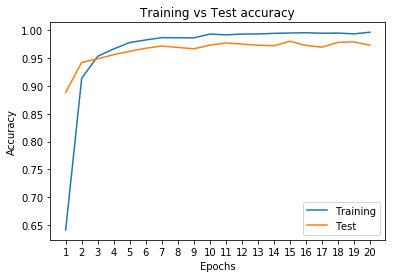

In [7]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(range(1, 21), train_acc)
plt.plot(range(1, 21), val_acc)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Training', 'Test'])
plt.title('Training vs Test accuracy')
plt.show()

In [14]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="rgb", target_size=(32,32))
    return image

In [15]:
image = load_and_scale_image('data/synthetic_digits/imgs_valid/4/4_01000.jpg')

In [16]:
from numpy import argmax

image = image_utils.img_to_array(image)
image = image.reshape(1, 32, 32, 3)
image = image/255
prediction = model.predict(image)
print(argmax(prediction))

4


In [18]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

[[8.4090608e-08 6.1233997e-01 3.2860899e-04 2.4054979e-01 6.8126917e-02
  6.6453248e-02 9.7212578e-06 1.2190626e-02 1.1076343e-06 1.6482545e-08]]


1
